이전에 과대 적합을 해결하는 대표적인 방법 중 하나로 가중치 규제(regularization)을 언급하였다. <br>
<br>

# 가중치 규제 : 
가중치 값이 커지지 않도록 제한하는 방법 <br><br>

가중치 값이 커지지 않게하면 왜 과대 적합을 해결할까?? <br>

가중치 규제를 하면 모델의 일반화 성능이 올라가게 되기 떄문이다 <br>
좀 더 구체적으로 알아보자.<br>
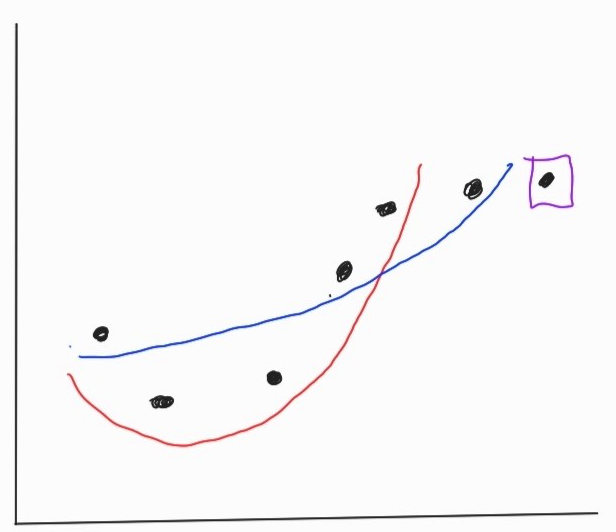<br>

위 그래프 중 두 선(빨강, 파란 선) 모두 점을 적당히 잘 나타내고 있다. <br><br>

그런데 두 선 중 어떤 선을 나타내는 모델이 더 성능이 좋을까?? <br>
이 경우 경사가 급한 그래프보다는 경사가 완만한 선(파란선)을 나타내는 모델이 성능이 더 좋다고 평가한다. <br>
그 이유는 경사가 높은 선 보다 경사가 낮은 선이 보라색 박스로 표시한 샘플 데이터를 더 잘 표현하기 때문이다.
<br><br>

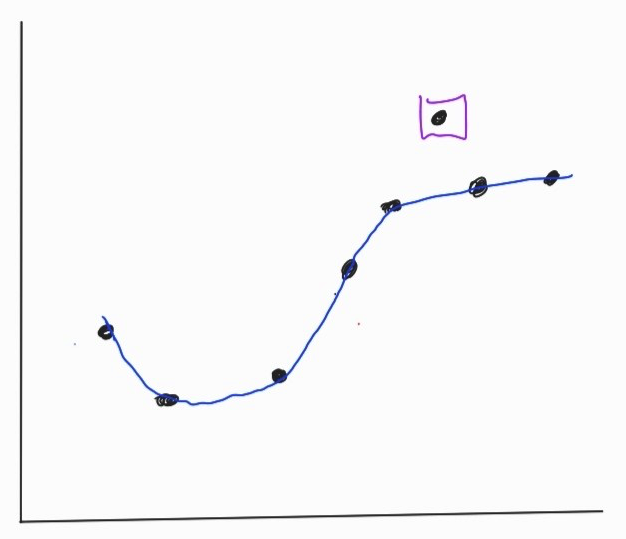<br>




그럼 위 그래프와 같이 점에 대해 거의 완벽히 표현하는 선, 즉 샘플 데이터에 딱 맞는 그래프는 어떤지 생각해보자 <br>
<br>
당연히 샘플 데이터에 딱 맞는 그래프는 성능도 최고 아닌가? <br><br>

그렇면 보라색 박스의 데이터가 샘플 데이터에 추가했다 생각해보자.. <br>
이전 샘플 데이터에 너무 딱 맞는 선을 모델이 나타내고 있기 떄문에 새로운 데이터를 제대로 표현하지 못하고 있다. <br><br>

<b>->즉 모델이 몇 개의 데이터에 너무 집착해버리면 새로운 데이터에 적응을 못하여 좋은 성능을 가질 수 없다.</b> <br>
-> 이것을 <b> 모델이 일반화되지 않았다 </b> 라고 말한다. <br> <br>

이런 경우에는 어떻게 해결해야 할까??<br>
-> 규제를 사용하여 가중치를 제한하면 모델이 몇 개의 데이터에 집착하지 않게 되므로 일반화 성능을 높일 수 있다. <br><br>

앞으로 대표적인 규제 기법인 L1 규제, L2 규제에 대해 알아보고 두 기법을 이전에 구현한 SingleLayer 클래스에 적용해보려고 한다. <br>
또한 규제를 적용하면 손실 함수의 그래프가 어떻게 변하는지도 알아보자. <br>

# L1 규제 :
손실 함수에 가중치의 절댓값인 L1 노름(norm)을 추가한다.<br>
L1 norm을 나타내면 아래와 같다 <br>
### $||w||_1 = \sum_{i = 1}^{n} |w_i|$ <br>
L1 norm인 n : 가중치 갯수를 의미 -> L1 규제를 가중치의 절댓값을 손실 함수에 더한 것으로 이해해도 괜찮음 <br> <br>

이제 이 L1 규제를 로지스틱 손실 함수에 적용 해보자<br>
먼저 로지스틱 손실 함수는 <br>
### L = -(ylog(a) + (1 - y)log(1 - a))
이전에 말했듯 손실 함수에 가중치의 절댓값인 L1 norm을 추가하면 L1 규제가 만들어 진다고 했다. <br>
그런데 단순히 L1 norm을 더하지 말고 규제의 양을 조절하는 파라미터 $\alpha$를 곱한 후 더하자 <br>
### L = -(ylog(a) + (1 - y)log(1 - a)) +$\alpha \sum_{i = 1}^{n} |w_i|$ <br><br>

$\alpha$는 L1 규제의 양을 조절하는 하이퍼파라미터 이다.<br><br>

예를 들어 보자 $\alpha$의 값이 크다면 전체 손실 함수의 값이 커지지 않도록 w 값의 합이 작아져야 한다 <br>
-> 이것을 <b>규제가 강해졌다 (가중치가 작아 졌기 때문에)</b> 라고 한다. <br>
반대로 $\alpha$의 값이 작다면<br>
-> 이것을 <b>규제가 약해졌다 (w의 합이 커져도 손실 함수의 값이 큰 폭으로 커지지 않기 때문에)</b> 
<br> <br>

이제는 경사 하강법으로 가중치를 업데이트하기 위해서 L1 규제를 적용한 로지스틱 손실 함수를 미분해보자<br>
## L1 규제의 미분
이전에 로지스틱 손실 함수를 가중치에 대해 미분해보았으니 계산과정은 생략 하겠다 <br>
다만 |w|를 미분하면 w 값의 부호 즉 w가 양수일시 +1, 음수일시 -1이 남기 때문에 w 값을 미분한 결과인 w의 부호라는 의미로 -> <b>sign(w)</b>라고 표현 할 것이다.
### $\frac{\delta}{\delta w}L = -(y - a)x + \alpha sign(w)$
이 식은 가중치 벡터 w에 대한 미분으로 확장하여 식을 전개하였다 <br>
<br>

또한 이 식을 가중치 업데이트 식에 적용하고 <br>
L1 규제에 학습률도 적용해 보자 -> L1 규제를 적용한 손실 함수의 도함수에 학습률을 곱하면 됨

### $w = w - \eta \frac{\delta L}{\delta w} = w + \eta((y - a)x - \alpha sign(w))$
여기서 $\eta$는 학습률을 나타낸다<br>
<br>
위 수식을 보면 L1 규제를 추가한 로지스틱 손실 함수르 경사 하강법으로 최적화 하는것을 생각해 보면 규제 하이퍼파라미터 $\alpha$와 가중치의 부호를 곱해서 갱신할 gradient에 더해주면 된다.<br>
<br>
파이썬으로 구현하려면
### w_grad += alpha * np.sign(w)
여기서 변수 alpha가 규제 하이퍼파라미터이고, np.sign() 함수는 배열 요소의 부호를 반환한다. <br>
<br>

그런데 위 식을 유도해오면서 궁금한 점이 있다.. <br>
절편에 대한 규제는 왜 안하지 ???? <br>
<br>
절편을 잘 생각해보자 절편이 변할때 모델은 어떤 방향으로 이동할지 변할 뿐 모델의 복잡도에는 영향을 주지 않기 떄문이다. <br>
<br>

역시 사이킷런에서는 L1 규제를 쉽게 구현할 수 있게 지원해준다. <br>
SGDClassifier 클래스에서 penalty 매개변수 값을 l1으로 지정하면 L1 규제를 적용할 수 있다. <br>
그리고 규제의 강도를 제어하는 하이퍼파라미터 $\alpha$를 위한 alpha 매개변수 또한 제공한다. <br>
<br>

### 라쏘(Lasso) 모델 :
회귀 모델에 L1 규제를 추가한 모델을 라쏘 모델이라고 한다. <br>
<br>
회귀 모델에도 같은 원리를 적용하여 손실 함수(제곱 오차)에 L1 규제를 적용할 수 있다. <br>
이러한 모델을 라쏘 모델이라고 부른다. <br>
라쏘 모델은 가중치를 줄이는 것을 넘어 일부 가중치를 0으로도 만들 수 있다. <br>
<br>
가중치가 0인 특성은 어떤 의미를 가질까? <br>
-> 모델에서 사용할 수 없다는 것과 같은 의미를 가진다 <br><br>

즉 일부 가중치를 0으로 만들수 있다는 의미는 모델에서 특성을 선택할지 말지 정할 수 있는 효과를 얻는다. <br>
<br>

당연하게도 사이킷런에서는 라쏘 모델도 지원한다. <br>
sklearn.linear_model.Lasso 클래스에서 라쏘 모델을 제공한다. <br>
<br>

미분 결과에서 L1 규제는 규제 하이퍼파라미터 $\alpha$에 많이 의존함을 알 수 있다. <br>
-> 가중치의 크기에 따라 규제의 양이 변하지 않으므로 규제 효과가 좋다고 할 수는 없다.
<br><br>

이러한 문제점을 해결할 방안이 없을까?? <br>
-> L1 규제 보다 규제 효과가 좋은 L2 규제에 대해 알아보자. <br>


# L2 규제 :
L2 규제는 손실 함수에 가중치에 대한 L2 노름(norm)의 제곱을 더한다.<br>
L2 norm은 아래와 같이 정의된다. <br>
### $||w||_2 = \sqrt{\sum_{i = 1}^{n} |w_i|^2}$ <br><br>

손실 함수에 L2 norm의 제곱을 더하면 L2 규제가 된다. <br>
### L = -(ylog(a) + (1 - y)log(1 - a)) +$\frac{1}{2} \alpha \sum_{i = 1}^{n} |w_i|^2$ <br>
여기서 $\alpha$는 L1 규제와 마찬가지로 규제의 양을 조절하기 위한 하이퍼파라미터이다. <br>
$frac{1}{2}$는 나중에 L2 규제를 미분하였을때 결과가 보기 좋게 하기 위해서 추가하였다. <br><br>

## L2 규제의 미분
뭐 L1 규제 미분하듯이 가중치에 대해 미분해 보면 <br><br>

### $\frac{\delta}{\delta w}L = -(y - a)x + \alpha w$
<br>
L2 규제를 미분하면 위와 같다. 단순히 로지스틱 손실함수를 가중치에 대해 미분한 것에 간단히 가중치 w만 남음을 알 수 있다. <br><br>

이 결과를 가중치 갱신 업데이트 식에 대입해보자<br>
### $w = w - \eta \frac{\delta L}{\delta w} = w + \eta((y - a)x - \alpha w)$
여기서 $\eta$는 L1 규제와 같이 학습률을 나타낸다<br> <br>

L2 규제를 경사 하강법 알고리즘에 적용하는 방법 또한 gradient에 $\alpha$와 가중치의 곱을 더하면 된다. <br>
파이썬으로 구현해 보면 <br>
### w_grad += alpha * w
<br>

자 이러한 L2 규제가 L1 규제보다 어떠한 점이 더 효과적인가?? <br>
<br>

L2 규제는 gradient 계산에 있어서 가중치의 값 자체가 포함된다. <br>
하지만 L1 규제는 가중치의 부호만 사용된다. <br>
따라서 L2 규제가 L1 규제보다 좀더 효과적이다. <br><br>

아니 그런데 L2 규제는 가중치를 완전히 0으로 만들지 않잖아 그러면 원하는 특성을 제외하는 즉 모델에서 특성을 선택할지 안할지를 정할 수 없잖아.. 그럼 L1 규제 (라쏘 모델) 에 비해 이점은 안좋은거 아닌가?? <br>
-> 가중치를 완전히 0으로 만들 수 있으면 특성을 제외하는 즉 선택할 수 있는 효과는 보지만 대신 모델의 복잡도가 떨어지게 된다. <br><br>

즉 장단점이 있는거다. 여러가지를 따져 봤을때 L2 규제를 널리 사용한다. <br><br>

## 릿지(Ridge) 모델 :
회귀 모델에 L2 규제를 적용한 것을 릿지 모델이라고 한다.
<br> <br>

당연하게도 L2 릿지 모델 또한 사이킷런에서 제공한다. <br>
sklearn.linear_model.Ridge 클래스로 제공을 한다. <br>
SGDClassifier 클래스에서는 매개 변수인 penalty를 l2로 지정하여 L2 규제를 추가할 수 있다. <br>
두 클래스 모두 규제의 강도는 매개 변수 alpha로 제어한다. <br>


## 로지스틱 회귀에 규제를 적용해보자

자 이젠 이전에 만든 SingleLayer 클래스에 L1 규제와 L2 규제를 적용해보자. <br>
실무에서는 L1 규제보단 L2 규제를 주로 사용한다고 하는데 왜 그런지 이번 예제를 통해 두 규제의 차이를 느껴보자. <br>

In [60]:
# gradient 업데이트 수식에 패널티 항을 반영해 보자

import numpy as np

class SingleLayer:
  
  # L1 규제와 L2 규제의 강도를 조절하는 매개변수 l1, l2를 __init__() 메서드에 추가한다.
  
  def __init__(self, learning_rate = 0.1, l1 = 0, l2 = 0): # l1과 l2의 기본값은 0이고 이때는 규제 적용 하지 않음
    self.w = None 
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_history = []  
    self.lr = learning_rate
    self.l1 = l1
    self.l2 = l2

  def forpass(self, x): 
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err): 
    w_grad = x * err
    b_grad = 1 * err 

    return w_grad, b_grad
  
  def activation(self, z):
    z = np.clip(z, -100, None) 
    a = 1 / (1 + np.exp(-z))

    return a

  def fit(self, x, y, epochs = 100, x_val = None, y_val = None):
    self.w = np.ones(x.shape[1]) 
    self.b = 0
    
    self.w_history.append(self.w.copy())   

    np.random.seed(42)

    for i in range (epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) 

      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)

        err = -(y[i] - a)

        w_grad, b_grad = self.backprop(x[i], err) 

        # 가중치 gradient에서 패널티 항의 미분값을 더한다
        # 이때 L1 규제와 L2 규제를 따로 적용하지 않고 하나의 식으로 작성했다.
        # (L1 규제, L2 규제 동시에 수행 가능)
        w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w 

        self.w -= self.lr * w_grad

        self.b -= b_grad 

        self.w_history.append(self.w.copy()) 

        a = np.clip(a, 1e-10, 1 - 1e-10) 

        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a)) 
      
      self.losses.append(loss/len(y) + self.reg_loss()) # self.reg_loss() 추가

      self.update_val_loss(x_val, y_val)

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) >= 0

  # 검증 세트의 손실을 계산하는 update_val_loss() 메서드에서 reg_loss()를 호출하도록 수정하자
  def update_val_loss(self, x_val, y_val):
    if x_val is None:
      return

    val_loss = 0

    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1 - 1e-10)

      val_loss += -(y_val[i] * np.log(a) + (1 - y_val[i]) * np.log(1 - a))

    self.val_losses.append(val_loss / len(y_val) + self.reg_loss()) # -> reg_loss() 호출하도록 수정

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

  # 로지스틱 손실 함수 계산에 패널티 항을 추가해보자
  # 로지스틱 손실 함수를 계산할 때 패널티 항에 대한 값을 더해야함.
  # 이를 위해서 reg_loss() 메서드를 SingleLayer 클래스에 추가함. 
  # 이 함수는 훈련 세트의 로지스틱 손실 함수의 값과 검증 세트의 로지스틱 손실 함수의 값을 계산할 때 모두 호출됨
  def reg_loss(self):
    return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w ** 2)

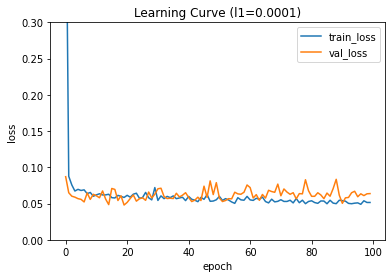

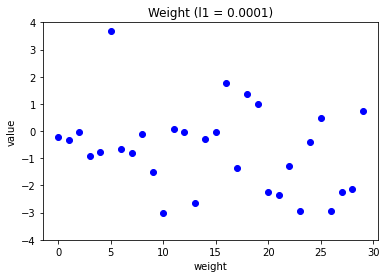

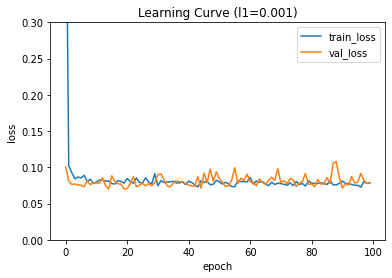

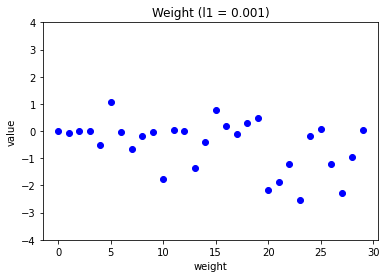

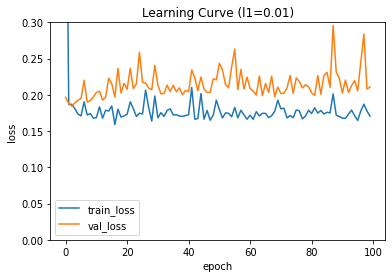

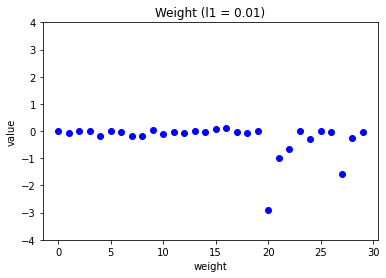

In [61]:
# 이제 먼제 L1 규제를 추가하여 로지스틱 회귀 모델을 훈련해보자

# cancer 데이터 세트에 L1 규제를 적용하고자 한다.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size = 0.2, random_state = 42)

train_mean = np.mean(x_train, axis = 0)
train_std = np.std(x_train, axis = 0)
x_train_scaled = (x_train - train_mean) / train_std

val_mean = np.mean(x_val, axis = 0)
val_std = np.std(x_val, axis = 0)
x_val_scaled = (x_val - val_mean) / val_std

x_val_scaled = (x_val - train_mean) / train_std

# L1 규제의 강도에 따라 모델의 학습 곡선과 가중치가 어떻게 바뀌는지 알기 위해
# 규제 강도를 0.0001, 0.001, 0.01 세 가지에 대해 확인해 보자

l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
  lyr = SingleLayer(l1 = l1)
  lyr.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  
  plt.title("Learning Curve (l1={})".format(l1))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l1 = {})'.format(l1))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4, 4)
  plt.show()

각 그래프들을 보면 꺾은선 그래프는 학습 곡선 그래프이고 산점도는 가중치에 대한 그래프 이다. <br> <br>
학습 곡선 그래프를 보면 규제가 더 커질수록 훈련 세트의 손실과 검증 세트의 손실 모두 높아지는 것을 확인 가능하다. <br>
즉 과소 적합 현상이 나타난다. <br> <br>

가중치 그래프를 보면 규제 강도 l1 값이 커질수록 가중치의 값이 0에 가까워지는 것을 확인할 수 있다. <br>
그래프를 보면 적절한 l1 하이퍼파라미터 값은 0.001로 보인다. <br>
따라서 이 값을 이용하여 모델의 성능 확인해 보겠다. <br>




In [62]:
layer5 = SingleLayer(l1 = 0.001)
layer5.fit(x_train_scaled, y_train, epochs = 20)
layer5.score(x_val_scaled, y_val)

# 결과를 확인해보니 규제를 적용하지 않고 검증 세트로 성능을 평가했던 결과와 똑같은 정확도를 보인다.
# 그럼 굳이 왜 L1 규제를 했지??
# 사실 이번에 적용한 데이터 세트의 크기가 작기 때문에 L1 규제의 효과가 크게 나타나지 않은 것이다.

0.978021978021978

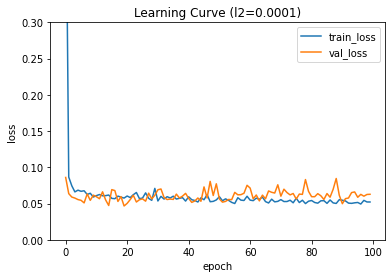

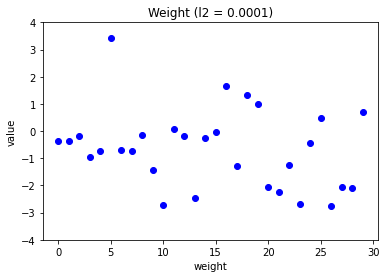

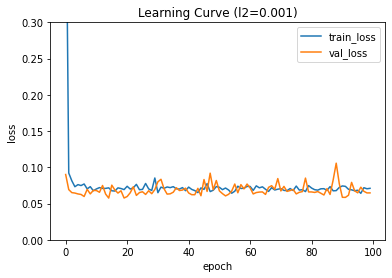

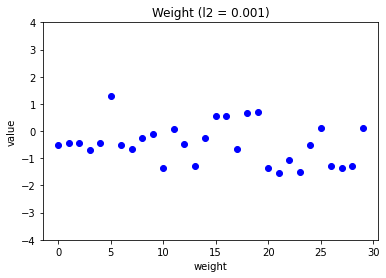

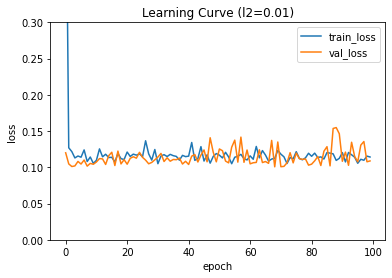

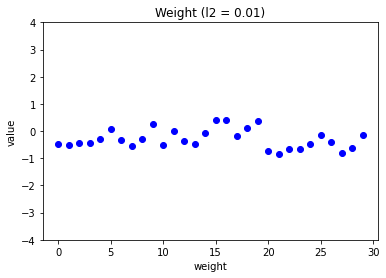

In [63]:
# 이제는 L2 규제를 적용해 보자

# cancer 데이터 세트에 L2 규제를 적용해 보자

l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
  lyr = SingleLayer(l2 = l2)
  lyr.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  
  plt.title("Learning Curve (l2={})".format(l2))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l2 = {})'.format(l2))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4, 4)
  plt.show()

두 그래프를 보면 L2 규제 또한 L1 규제와 비슷한 양상을 보이는 것을 알 수 있다. <br>
<br>

그런데 마지막 학습 곡선 그래프를 보자 (L2 = 0.01)<br>
L2 규제는 규제 강도가 강해져도 L1 규제에 비해 과소 적합이 심해지지는 않는 것으로 보인다. <br>
<br>
또한 가중치 그래프를 보아도 가중치가 0에 매우 가깝게 줄어들지는 않는다는 것도 확인할 수 있다. <br>


In [64]:
# L2 규제를 적용한 모델은 50 epoch 횟수만큼 훈련하고 성능을 확인해 보자
# 이 때는 l2 = 0.01 의 규제 강도에 대해 적용해 보겠다.

layer6 = SingleLayer(l2 = 0.01)
layer6.fit(x_train_scaled, y_train, epochs = 50)
layer6.score(x_val_scaled, y_val)

# 성능을 보니 정확도가 L1 규제와 같다..
# -> L1 규제를 한 모델이나 L2 규제를 한 모델이나 성능이 큰 차이가 없다.
# 즉 두 모델 모두 검증 샘플에 대해 예측한 샘플이 똑같다.(정확하게 예측한 샘플 수가 동일)

0.978021978021978

In [65]:
np.sum(layer6.predict(x_val_scaled) == y_val)

# 총 91개 샘플 중 89개를 맞춘 것이다.

89

위 결과를 보면 L1 규제를 쓰나 L2 규제를 쓰나 같은 결과가 나왔다. <br>
하지만 L1 규제를 썼을때 보다 L2 규제를 썼을때 epoch가 크게 늘어났다. <br>
L1 규제는 20번의 epoch 동안 훈련 했지만 L2 규제의 경우 50번의 epoch 동안 훈련을 했다. <br>
<br>
그 이유는 L2 규제의 경우 가중치를 강하게 제한했기 때문에 알고리즘이 검증 세트의 손실값을 일정 수준으로 유지하면서 전역 최솟값을 찾는 과정을 오래 반복할 수 있었기 때문이다. <br><br>

이전에 말했듯 사이킷런에서 L1 규제와 L2 규제를 지원한다고 하였다. <br>
사이킷런을 이용해 L1, L2 규제를 사용해보자 <br>


In [66]:
# SGDClassifier에서 규제를 사용해 보자

# 매개변수 penalt에 l1 이나 l2를 매개변수 값으로 전달하고 
# 매개변수 alpha를 통해 규제의 강도를 정하면 된다.

from sklearn.linear_model import SGDClassifier

# L2 규제로, 규제의 강도는 alpha = 0.001로 모델을 만들자
sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001, random_state=42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

# 이 경우에 당연히 위의 결과와 같다.

0.978021978021978

사이킷런에서는 SGDClassifier 클래스 말고도 L1, L2 규제를 제공하는 모델이 많다.<br>
ex) LogisticRegression, SVC, LinearSVC 클래스 등등 <br>
이 클래스들은 매개변수 penalty 대신 주손실 함수의 크기를 조절하기 위해 하이퍼파라미터 C를 제공한다. <br>
(SGDClassifier 클래스에서 매개변수 alpha를 사용하여 규제를 제어하는 것과 유사)<br>
-> 이때 C는 alpha와 반대의 역할을 한다. <br>
<br>
매개변수 C가 커지면 규제가 줄고 C가 작으면 규제가 강해지는 것이다. <br><br>

지금까지 L1, L2 규제에 대해 알아보았다. <br>
다음에는 훈련 노하우 중 교차 검증에 대해 알아볼 것이다. 이 검증 방법은 전체 데이터 세트의 샘플 수가 적을때 사용할 수 있는 방법니다. <br> <br>

### Reference <br>
박해선, 딥러닝 입문, 이지스퍼블리싱, 2019, 137 ~ 148pg